# Multi Plane 2D model
- The solver is in the package "Model_2D_Package"
- Solves for however nk number of k:s
- Currently running tf = 50 and nu = 100 (dicretization of control)

In [364]:
%reset -f

In [370]:

import matplotlib.pyplot as plt
from casadi import *
import numpy as np

import importlib
import Model_2D_Package.Multi_Plane_2D_solver as model
importlib.reload(model)

<module 'Model_2D_Package.Multi_Plane_2D_solver' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\Model_2D\\Model_2D_Package\\Multi_Plane_2D_solver.py'>

# Multi Plane Solver

Solver options
- w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
- w_opt, J_opt = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt)

Other functions
- plot_multi_plane_2D(w_opt,k_values)
    - plots optimal trajectories for all planes
- u_opt = u_opt_return(w_opt)
- sol = reconstruction_multi_plane_2D(u_opt,k_value,multiplier)
    - Reconstructs the state trajectory, sol is a dictonary
- simulate_trajectories(u_opt, M)
    - MC simulation, plot and compute crash rate

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 30

                                   (scaled)                 (unscaled)
Objective...............:  -8.3496641646399212e+01   -8.3496641646399212e+01
Dual infeasibility......:   1.9881344264622961e-09    1.9881344264622961e-09
Constraint violation....:   4.2496139940340072e-10    4.2496139940340072e-10
Variable bound violation:   9.9522398100404530e-09    9.9522398100404530e-09
Complementari

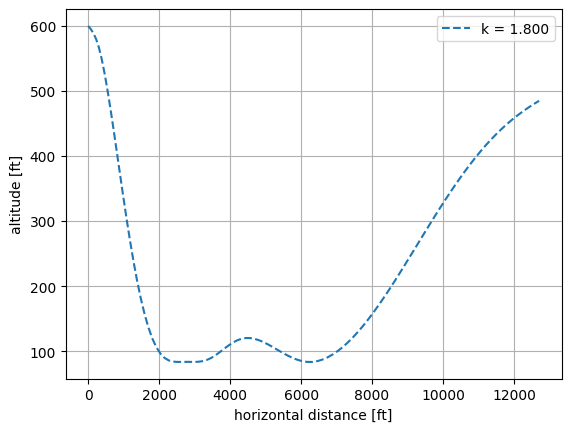

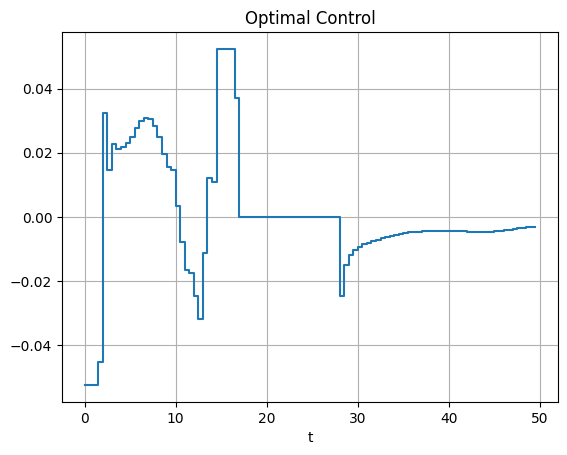

In [400]:
k_values=[1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

# what k are infeasible: 2.1, 2.05, 2.04, 2.03

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 69

                                   (scaled)                 (unscaled)
Objective...............:  -8.3496641535129314e+01   -8.3496641535129314e+01
Dual infeasibility......:   6.2926821217266119e-09    6.2926821217266119e-09
Constraint violation....:   1.0739995559561066e-09    1.0739995559561066e-09
Variable bound violation:   9.8567599637888748e-09    9.8567599637888748e-09
Complementari

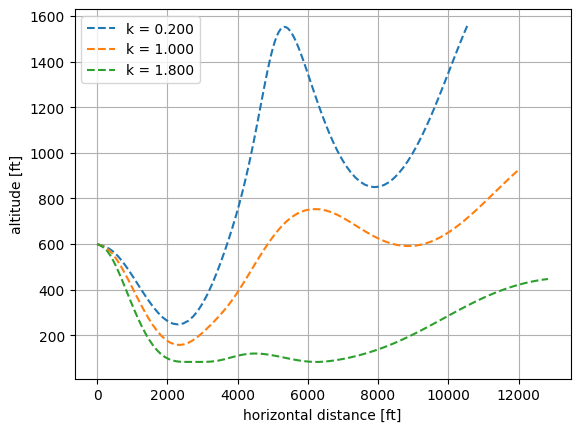

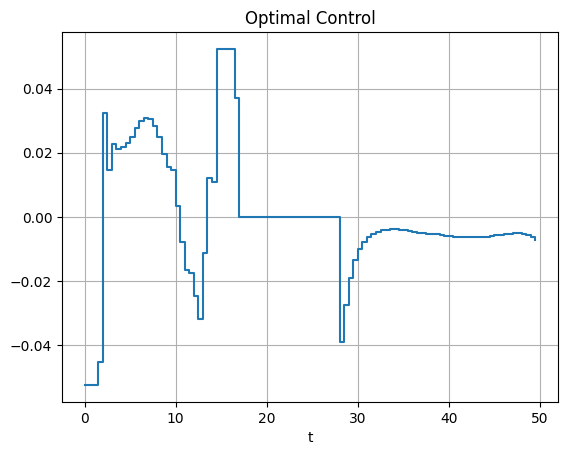

In [401]:
# k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
k_values=[0.2, 1, 1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

# Compute State Trajectories from given control and k

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924153733572820e+02   -5.0924153733572820e+02
Dual infeasibility......:   2.9524189001305110e-12    2.9524189001305110e-12
Constraint violation....:   2.0423799691524049e-10    2.4556356947869062e-10
Variable bound violation:   9.9847942136577217e-09    9.9847942136577217e-09
Complementari

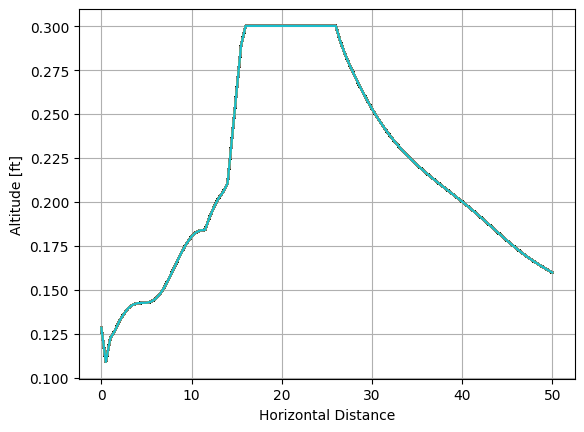

0.3001966413278188


In [399]:
k_values=[2]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
M = 1000
k_samples = np.random.normal(loc=1.0, scale=0.25, size=M)
min_hs = []
plt.figure()
for i in range(M):
    sol = model.reconstruction_multi_plane_2D(model.u_opt_return(w_opt),k_samples[i],1)
    min_hs.append(min(sol['h']))
    plt.plot(sol['x'], sol['h'])
    
plt.xlabel('Horizontal Distance')
plt.ylabel('Altitude [ft]')
plt.grid(True)
plt.show()



# MC Single Plane

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 30

                                   (scaled)                 (unscaled)
Objective...............:  -8.3496641646399212e+01   -8.3496641646399212e+01
Dual infeasibility......:   1.9881344264622961e-09    1.9881344264622961e-09
Constraint violation....:   4.2496139940340072e-10    4.2496139940340072e-10
Variable bound violation:   9.9522398100404530e-09    9.9522398100404530e-09
Complementari

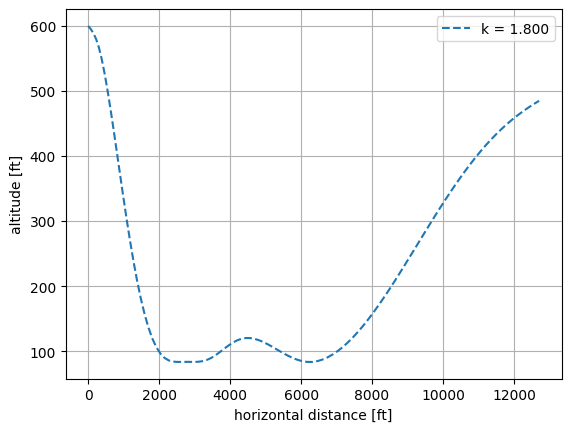

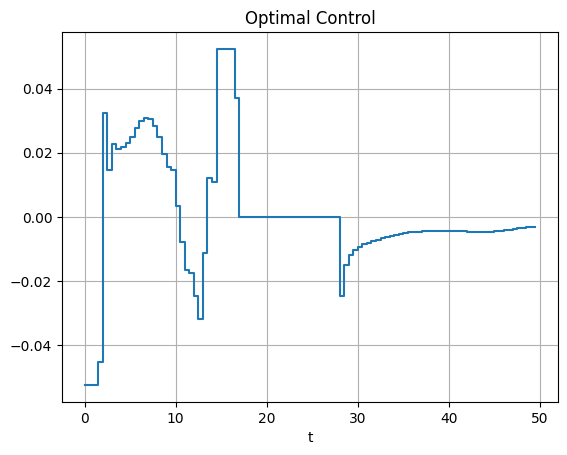

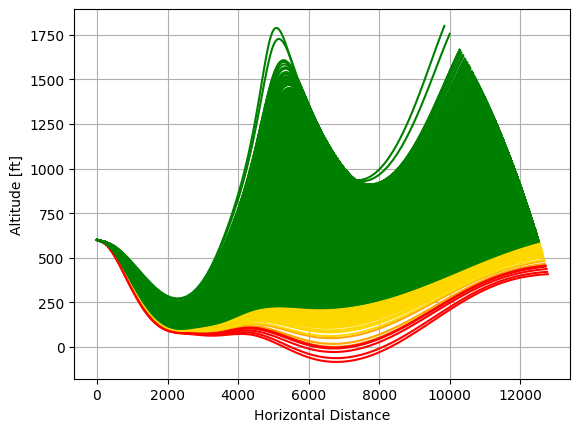

min k from sample: -0.015
max k from sample: 1.938
Minimum altitude over all runs: -84.082
Crash rate: 0.05%
Fail 50 feet rate: 0.08%
Fail 100 rate: 0.8200000000000001%
x2dotdot < -2g: []
x2dotdot > 10g: []


In [402]:
k_values=[1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000)
print("x2dotdot < -2g:", violations['x2dotdot_low'])
print("x2dotdot > 10g:", violations['x2dotdot_high'])
# print("alpha violations:", violations['alpha_violation'])

# MC Single Plane

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924153733572820e+02   -5.0924153733572820e+02
Dual infeasibility......:   2.9524189001305110e-12    2.9524189001305110e-12
Constraint violation....:   2.0423799691524049e-10    2.4556356947869062e-10
Variable bound violation:   9.9847942136577217e-09    9.9847942136577217e-09
Complementari

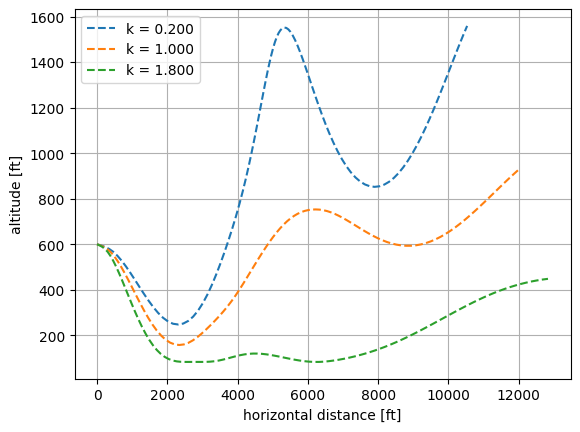

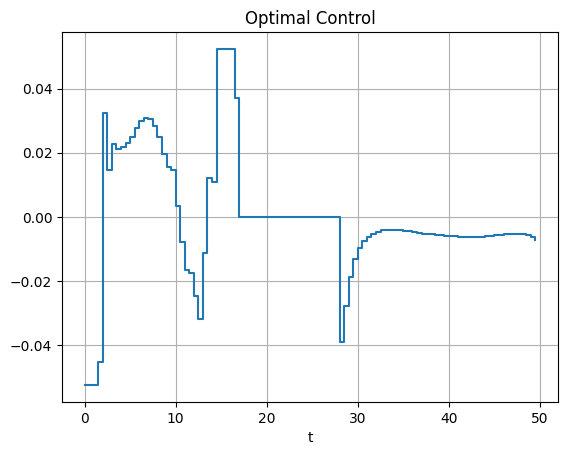

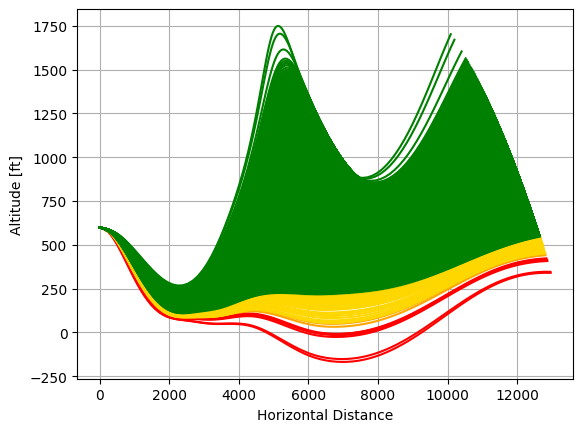

min k from sample: 0.020
max k from sample: 2.034
Minimum altitude over all runs: -168.210
Crash rate: 0.06%
Fail 50 feet rate: 0.08%
Fail 100 rate: 0.86%
x2dotdot < -2g: []
x2dotdot > 10g: []


In [403]:
# Prep initial guess
w_opt,_ = model.solve_ocp_multi_plane_min_h([1])
x_opt = w_opt[model.params.nu+1:].tolist()
u_opt = w_opt[1:model.params.nu+1].tolist()

# solve multi plane problem
#k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
k_values=[0.2,1,1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt, u_opt)
# plot
model.plot_multi_plane_2D(w_opt,k_values)
# get the computed optimal control
u_opt = model.u_opt_return(w_opt)
# MC
violations = model.simulate_trajectories(u_opt=u_opt, M=10000)
print("x2dotdot < -2g:", violations['x2dotdot_low'])
print("x2dotdot > 10g:", violations['x2dotdot_high'])
#print("alpha violations:", violations['alpha_violation']) 
# all alpha will be violated


Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:  -5.1310875598186988e+02   -5.1310875598186988e+02
Dual infeasibility......:   1.1562530604423513e-11    1.1562530604423513e-11
Constraint violation....:   1.5575096767861396e-09    1.5575096767861396e-09
Variable bound violation:   9.9845374190721259e-09    9.9845374190721259e-09
Complementari

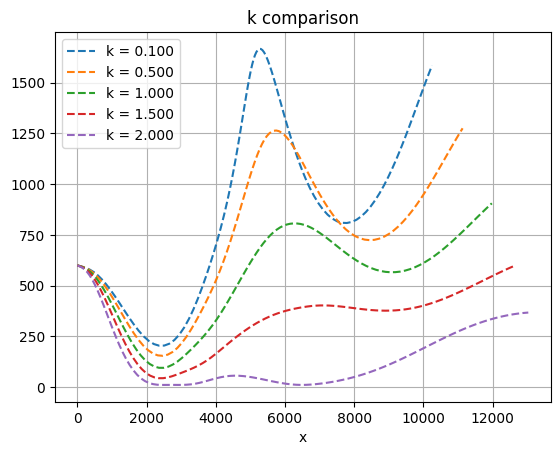

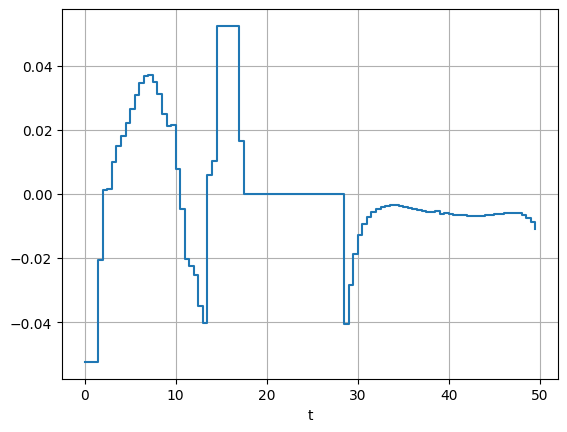

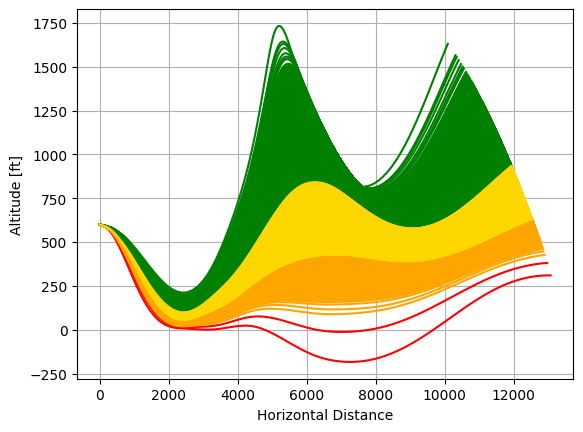

min k from sample: 0.038
max k from sample: 2.117
Minimum altitude over all runs: -183.092
Crash rate: 0.02%
Fail 50 feet rate: 4.21%
Fail 100 rate: 56.3%
x2dotdot < -2g: []
x2dotdot > 10g: []


In [317]:
# Prep initial guess
w_opt,_ = model.solve_ocp_multi_plane_min_h([1])
x_opt = w_opt[model.params.nu+1:].tolist()
u_opt = w_opt[1:model.params.nu+1].tolist()

# solve multi plane problem
k_values=[0.1, 0.5, 1, 1.5, 2]
w_opt, _ = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt, u_opt)
# plot
model.plot_multi_plane_2D(w_opt,k_values)
# get the computed optimal control
u_opt = model.u_opt_return(w_opt)
# MC
violations = model.simulate_trajectories(u_opt=u_opt, M=10000)
print("x2dotdot < -2g:", violations['x2dotdot_low'])
print("x2dotdot > 10g:", violations['x2dotdot_high'])
# print("alpha violations:", violations['alpha_violation']) 
# all alpha will be violated
